**Objective:** To predict based on diagnostic measurements whether a patient has diabetes.

The Diabetes data set is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Explanatory Variables:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function - a measure of family history (of diabetes)
* Age: Age (years)

Response Variable:

* Outcome: Class variable (0 or 1), 1 = has diabetes, 0 = no diabetes


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


All of our variables are numerical and we seemingly do not have any missing values.

I say seemingly because upon further inspection, we see that our missing variables have been replaced with 0's instead of being missing entirely.

This is true for the following variables: Glucose, Blood Pressure, Skin Thickness, Insulin and BMI as those cannot be 0. Whereas a woman can have 0 pregnancies so we're going to assume that those are not missing.

In [35]:
len(df[df['Glucose'] == 0])

5

In [36]:
len(df[df['BloodPressure'] == 0])

35

In [37]:
len(df[df['SkinThickness'] == 0])

227

In [38]:
len(df[df['Insulin'] == 0])

374

In [39]:
len(df[df['BMI'] == 0])

11

Text(0.5, 1.0, 'Distribution of Glucose')

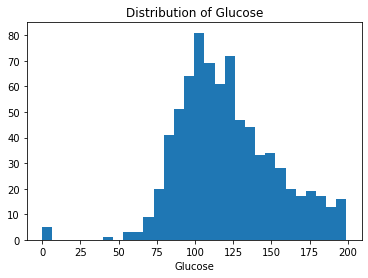

In [40]:
plt.hist(df['Glucose'], bins = 30)
plt.xlabel('Glucose')
plt.title('Distribution of Glucose')

Text(0.5, 1.0, 'Distribution of Blood Pressure')

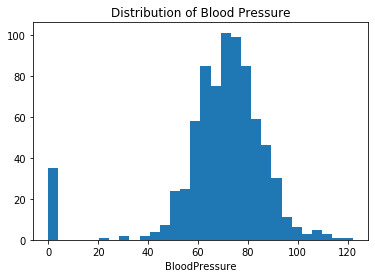

In [41]:
plt.hist(df['BloodPressure'], bins = 30)
plt.xlabel('BloodPressure')
plt.title('Distribution of Blood Pressure')

Text(0.5, 1.0, 'Distribution of Skin Thickness')

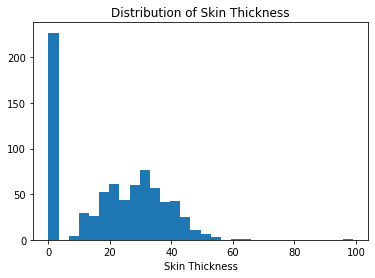

In [42]:
plt.hist(df['SkinThickness'], bins = 30)
plt.xlabel('Skin Thickness')
plt.title('Distribution of Skin Thickness')

Text(0.5, 1.0, 'Distribution of Insulin')

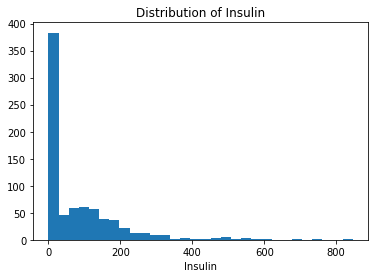

In [43]:
plt.hist(df['Insulin'], bins = 30)
plt.xlabel('Insulin')
plt.title('Distribution of Insulin')

Text(0.5, 1.0, 'Distribution of BMI')

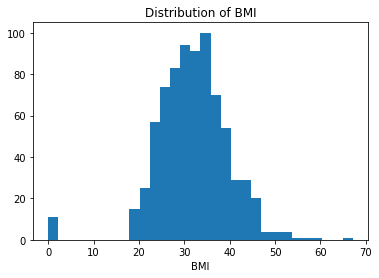

In [44]:
plt.hist(df['BMI'], bins = 30)
plt.xlabel('BMI')
plt.title('Distribution of BMI')

Taking a look at our missing values, we find that we're missing 5 instances in Glucose, 35 in BloodPressure, 227 in SkinThickness, 374 in Insulin, and 11 in BMI.

The number of missing values in SkinThickness and Insulin worry me as we're missing about a third of the data for SkinThickness and close to half of the data for Insulin.

We're going to impute the data with their respective averages but I'll also keep an eye out to see if it is worth it to include the Insulin variable. We are 'guessing' close to half of the data for the Insulin variable, but we also know that Insulin levels are directly related to disbetes so it may be worth keeping despite so many missing values.

Other than that, the distribution of the other variables all seem normal and within reasonable range of values without too many outliers.

In [45]:
df['Insulin'] = df['Insulin'].replace(to_replace = 0, value = 79.8)

df['SkinThickness'] = df['SkinThickness'].replace(to_replace = 0, value = 20.5)

df['BloodPressure'] = df['BloodPressure'].replace(0, 69.1)

df['BMI'] = df['BMI'].replace(0, 32)

df['Glucose'] = df['Glucose'].replace(0, 121)

Text(0.5, 1.0, 'Distribution of Pregnancies')

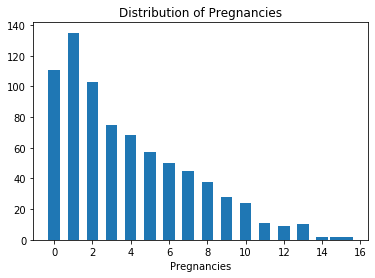

In [46]:
preg_values = df['Pregnancies'].unique()
preg_values.sort()

plt.hist(df['Pregnancies'], align = 'left', rwidth=0.6, bins = preg_values)
plt.xlabel('Pregnancies')
plt.title('Distribution of Pregnancies')

Text(0.5, 1.0, 'Distribution of Age')

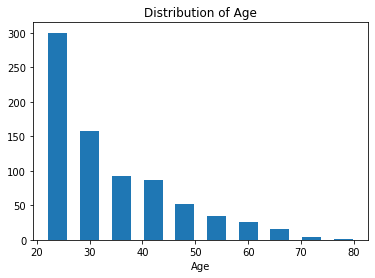

In [47]:
plt.hist(df['Age'], rwidth=0.6)
plt.xlabel('Age')
plt.title('Distribution of Age')

The distributions for Age and Pregnancies both seem reasonable as well. We see that most of our respondents are between the ages of 20-40 which matches the plot of Pregnancies is also right skewed. I am still quite surprised to see that there are so many respondents with 5 or more pregnancies. I was expecting the number to be a lot lower. I think this is due to the specific constraint of Pima Indian women in the study and it would be interesting to compare this with that of American women.

In [48]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127957,0.208984,0.013103,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127957,1.000000,0.219659,0.160594,0.396585,0.231470,0.137100,0.266591,0.492911
BloodPressure,0.208984,0.219659,1.000000,0.133895,0.010935,0.281232,0.000376,0.326743,0.162981
SkinThickness,0.013103,0.160594,0.133895,1.000000,0.240658,0.535488,0.155117,0.026022,0.174811
Insulin,-0.018082,0.396585,0.010935,0.240658,1.000000,0.189850,0.157806,0.038653,0.179186
BMI,0.021546,0.231470,0.281232,0.535488,0.189850,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137100,0.000376,0.155117,0.157806,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266591,0.326743,0.026022,0.038653,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492911,0.162981,0.174811,0.179186,0.312249,0.173844,0.238356,1.000000


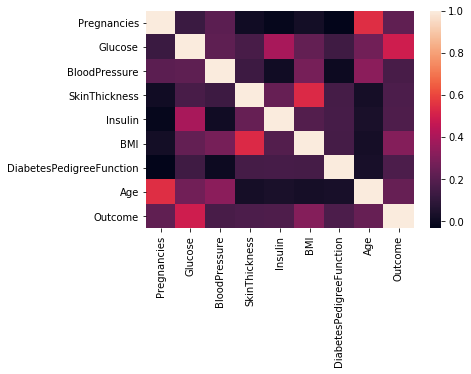

In [49]:
sns.heatmap(data = df.corr())

We do not see any correlations between explanatory variables which is good since it means that we do not have multicollinearity. We also do not see a linear relationship between our explanatory variables and the response variable which is fine since we're building a logistic regression model.

### Building the Logistic Regression Model

#### With Insulin

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
            'DiabetesPedigreeFunction', 'Age', 'Insulin']].to_numpy()
y = df[['Outcome']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

log_clf = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

gridsearch = GridSearchCV(log_clf, param_grid, n_jobs = -1)

gridsearch.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
gridsearch.best_score_

0.7588964414234306

In [52]:
best_est = gridsearch.best_estimator_
best_est.score(X_test,y_test)

0.7922077922077922

In [53]:
best_est.coef_

array([[ 0.08573135,  0.03409995, -0.03745882,  0.00709056,  0.0458174 ,
         0.07927299,  0.0380046 , -0.00144755]])

#### Without Insulin

In [54]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
            'DiabetesPedigreeFunction', 'Age']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

log_clf = LogisticRegression()

gridsearch = GridSearchCV(log_clf, param_grid, n_jobs = -1)

gridsearch.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
gridsearch.best_score_

0.7590030654404905

In [56]:
best_est = gridsearch.best_estimator_
best_est.score(X_test,y_test)

0.8181818181818182

In [59]:
best_est.coef_

array([[ 0.13695114,  0.03433629, -0.0083181 , -0.00559046,  0.08738558,
         0.92063162,  0.00821349]])

In [60]:
best_est.intercept_

array([-8.37168382])

### Conclusion

We trained 2 Logistic Regression models, one using the Insulin variables and one without. We achieved 81% accuracy on the model without using Insulin and 79% on the model with Insulin. The equation for our model without is:

$$ logit(p_i) = -8.37 + 0.137*Pregnancies + 0.034*Glucose - 0.008*BloodPressure - 0.006*SkinThickness + 0.087*BMI + 0.921*DiabetesPedigreeFunction + 0.008*Age $$

This suggests that the most important factors (from the ones in this data set) that determine if someone has diabetes are their family history (DiabetesPedigreeFunction) and the number of Pregnancies that the person has had.